<a href="https://colab.research.google.com/github/Sahil-Chhabra-09/Convolution-Neural-Networks/blob/main/Detection_Algorithms_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Object Detection

#### Object Localization

not only classifying image, determining it's boundaries

Usually classification has one object that we try to recognize. In contrast, for localization, there can be multiple objects

We already know how to build a standard neural network for object detection. To output localization as well, we can change our neural network to have a few more output units that output a bounding box. So, in particular, we can have the neural network output four more numbers, and I'm going to call them bx, by, bh, and bw. And these four numbers parameterize the bounding box of the detected object.

(bx,by) = center of bounding box

(bh,bw) = height and width of the bounding box

For autonomous driving, the classifications can be:
1. pedestrian
2. car
3. motorcycle
4. background

Hence, our y which is output looks like

y = 

[Pc(is there any object of the above classes detected),<br>bx<br>,by<br>,bh<br>,bw<br>,c1(if Pc = 1, then which class does the object belong to from 1-3)<br>,c2<br>,c3<br>]

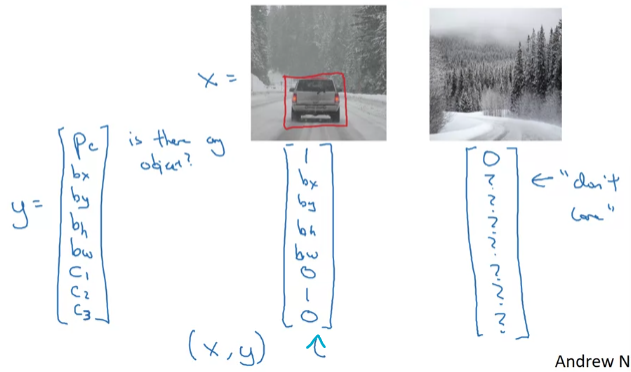

The applications of the above approach are limitless.

We can make neural networks output various landmarks, various data points detected from image if we have such dataset.

This can be used for recognizing emotions from the image and can also be used in AR for facial mapping of filters

Ofcourse to implement and train a neural network like this, we will require a labeled training dataset which will have the input images as well as the landmarks marked by someone

We can also annotate key positions in the person's pose to detect poses of a person

#### Multiple Image Detection

works based on concept of sliding window

We train conv net on closely cropped and centered input images of cars with a binary output of whether it is a car or not

Then, we start by picking a certain window size of the actual image and make the prediction and slide the window.

We repeat the above process with a larger sliding window and some stride and repeat this process each time with a larger sliding window

This is computationally very expensive

#### Implementing the above algorithm convolutionally

implementing fully connected layers through convolutional layers

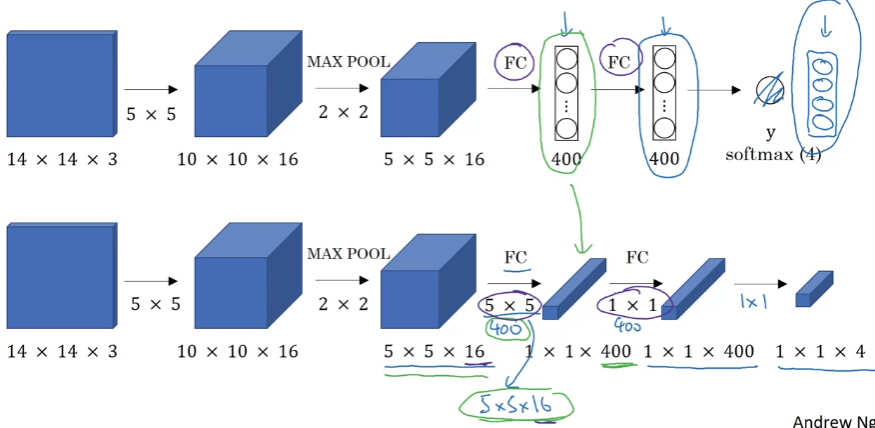

convolution implementation of sliding windows

Suppose our conv net is trained on 14x14x3 images just like above

And our test set image is 16x16x3 and let's say we use stride of 2 for sliding window.

Images generated for convnet = 

((n-f)/s + 1)*2

((16-14)/2 + 1)*2 = 2*2 = 4

So, we get 4 images for our convnet to classify

Now most of these computations are redundant. What we can actually do is:

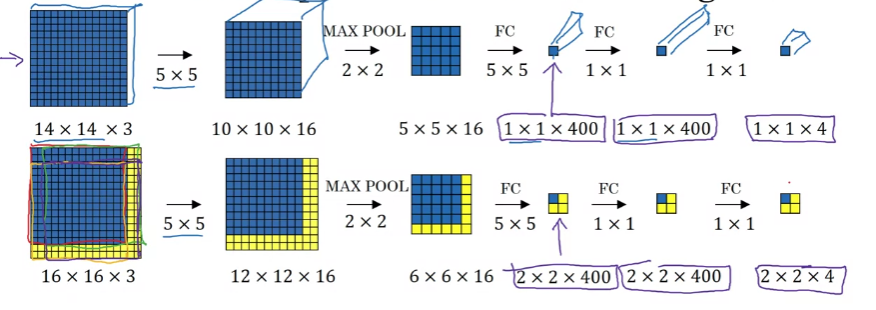

Instead we implement the same convolutional operation on this input image and at last the first blue block is the result of applying convolution operation on the first window of input image and the rest 3 blocks are result of running convnet on remaining 3 windows

blocks generated by convnet is similar to applying filter of 14x14x3 on the input image. Eg.

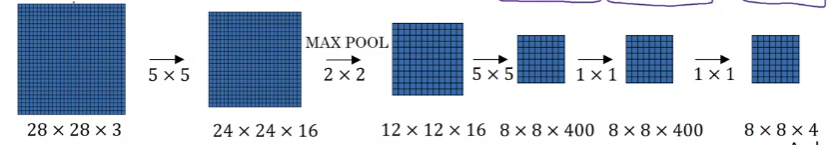

28-14/2 + 1 = 7+1 = 8

Hence, we get 8*8 as final output, so windows generated = 64

Now, it's because of the Max Pool layer that our 14x14x3 filter runs with a stride of 2

If it was 1x1 MaxPool, our filter would run with a stride of 1

This algorithm still has one weakness, which is the position of the bounding boxes is not going to be too accurate

#### Bounding Box Predictions

Sometimes, none of the boxes really match up with the position of the object. And in some cases, the boundary box is  not even a perfect square

The better approach is YOLO ( You only look once ) algorithm

##### YOLO algorithm

* we build a grid let's say of 3x3 but in reality it's much finer
* then we implement the very first object localization algorithm on each grid
* so for each grid, the y will have dimension = 1x8, hence our training label will be of dimension 3x3x8
* Now, we will make our convolutional layers in such a way that our output is of dimension 3x3x8 on which our network can train

This is a convolutional implementation and we are not implementing this algorithm 3 times on the 3x3 grid

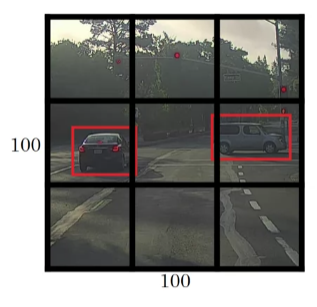

This actually runs very fast

Now, how it specifies bounding boxes more accurately is it specifies bx,by,bh and bw with respect to the grid

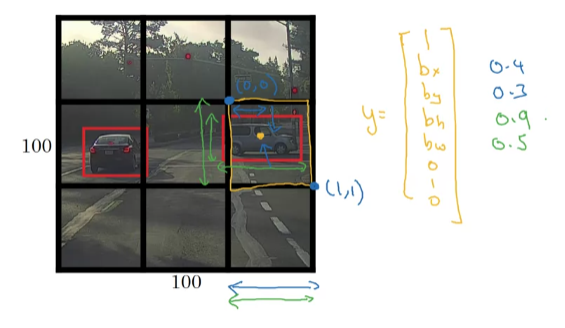

##### Additional info to make YOLO algo work even better

1. **Intersection Over Union**(IOU)

  To tell if object detection algorithm is working well

  Suppose our prediction is purple box but the answer is red box

  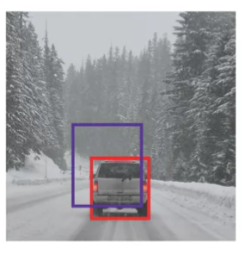

  What it does is it computes it's intersection over union

  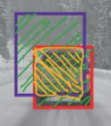

  IOU = size of yellow box/size of green box

  The answer is correct if IOU >= 0.5

  We can tell that the higher the IOU is the more accurate is the bounding box

2. **Non-max Suppression**

  One of the problems with the algorithm is it might detect a single object multiple times. Non-max suppression is a way for us to make sure it doesn't happen.

  The basic idea is that it first keeps the boundary box with the highest prediction probability (Pc) in our output and then it rejects those boundary boxes overlapping with this box. The amount of overlapping can be identified with IOU

  Next we then go to the remaining rectangles and do the same

  So, it suppresses the boundary boxes which do not have maximal probabilities and keeps the rest

  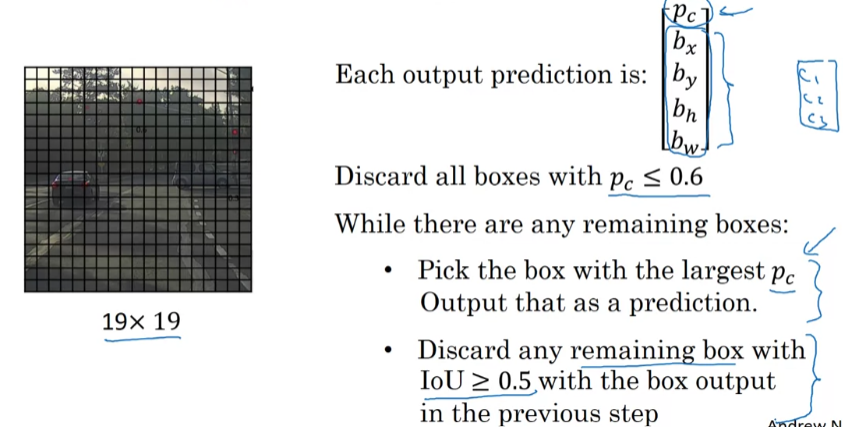

  Now if there are multiple classes, we perform the same for each individual class

3. Anchor Boxes:
  
  Another problem that still exists is that each of the grid cell only detects a single object, to solve this we use the idea of anchor boxes

  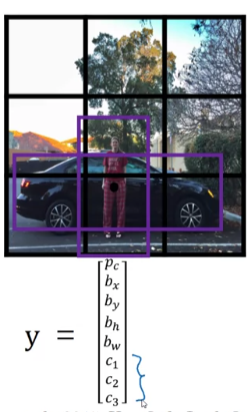

  The basic idea is we define let's say 2 anchor boxes (in reality there are somewhere around 5 or more)

  Now, the class label is changed as: 

  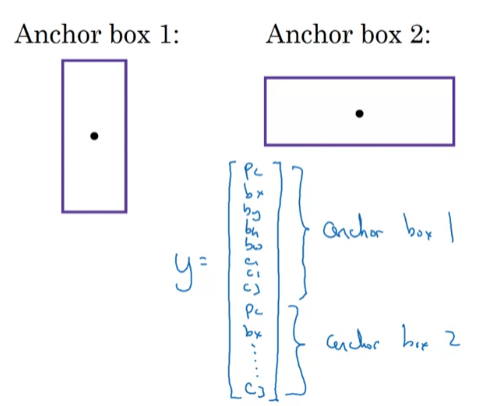

  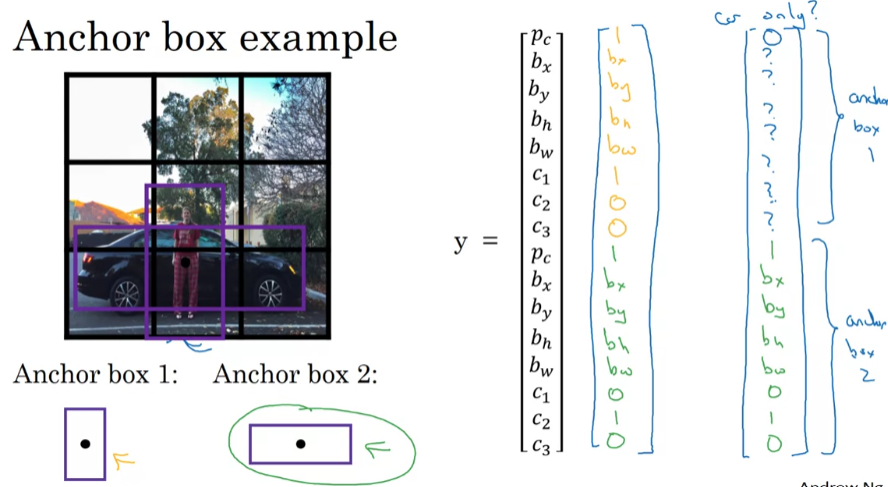

  Hence, if there are two anchor boxes considered, then the training label's shape for each grid will change as 8xno. of anchor boxes

  Hence the final shape for each input image will be 3x3x16 for 3x3 grid with 2 anchor boxes

  The way to decide if each grid cell should be assigned multiple anchor boxes is it's IOU with the boundary box

  Each anchor box is assigned some shape, now we check the IOU of these anchor boxes with the actual boundary box

### YOLO algorithm

Putting it all together

Suppose we're trying to train an algorithm to detect three objects: pedestrians, cars, and motorcycles

If we're using two anchor boxes, then the outputs y will be three by three because you are using three by three grid cell, by two, this is the number of anchors, by eight(Pc(1) + boundary box(4) + classes(3))

3x3x16 or 3x3x2x8

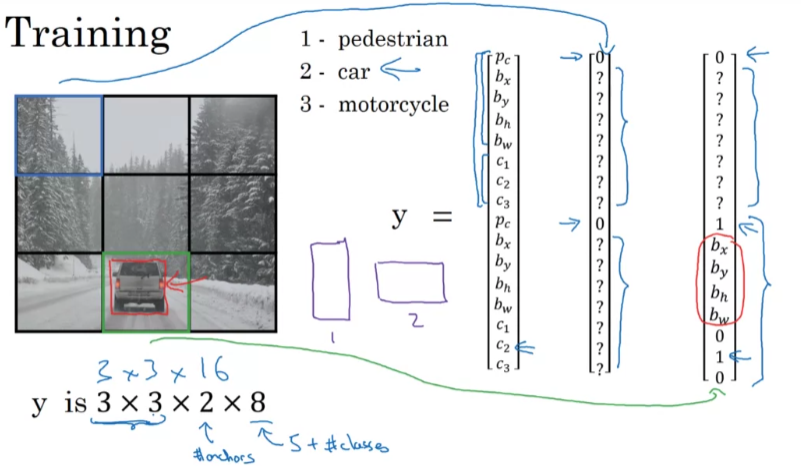

We train a convnet that takes an input image(100x100x3) and outputs 3x3x16

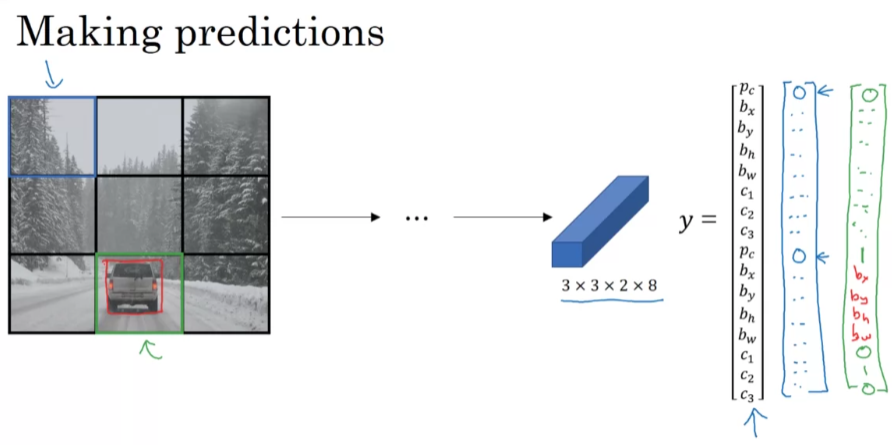

finally we run it through non-max suppression

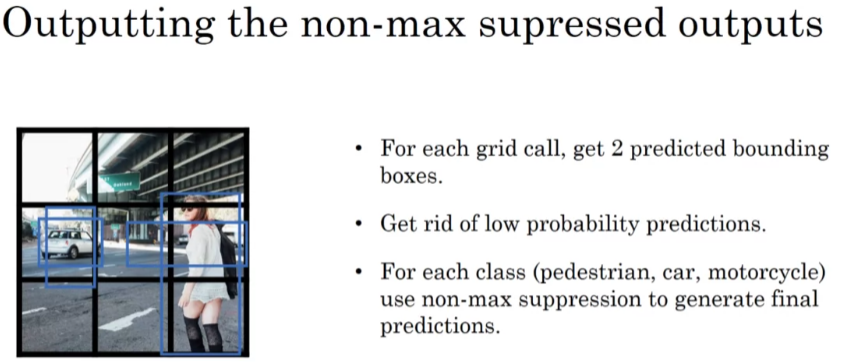

After this we would have detected all cars and all the pedestrians

### Region Proposals

There are a set of ideas called region proposals. What they actually do is apply an algorithm known as segmentation algorithm which outputs blobs of different colors and the idea is to run CNN only on these blobs of colors instead of whole image.

It is somewhat more efficient than sliding window

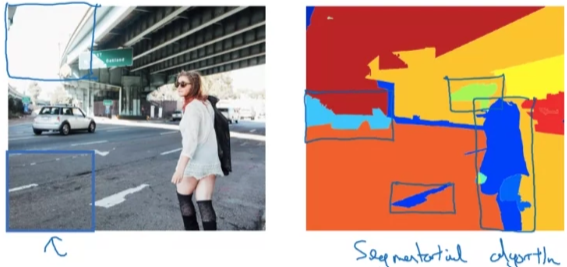

Although there are several other advancements on this approach, they are still not fast as YOLO

### U-Net

#### Semantic Segmentation with U-Net

goal is to draw a careful outline around the object 

It attempts to label every single pixel

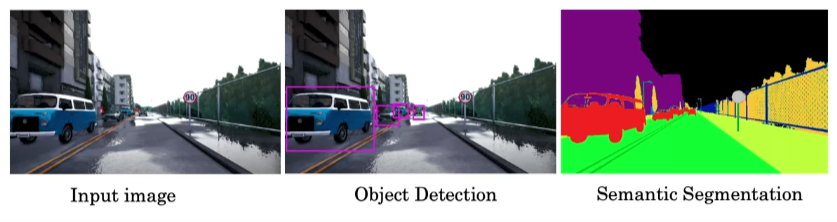

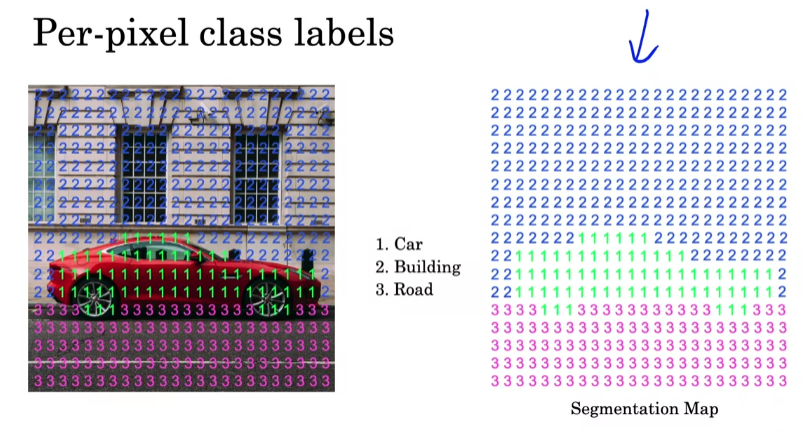

The neural networks in this case has to generate a whole matrix of labels

Generally in our convolution neural networks, the height and width get's smaller.

But here we need to blow it back up to a full size image. That is what U-Net architecture looks like. The operation used to do this is *transpose convolution*

#### Transpose Convolutions

Let's say we have a 2x2 input and we want a 4x4 output

To do that we will use 3x3 filter, padding = 1 and stride = 2

In the regular convolution we would take filter and place it on top of the input but in transpose convolution, we place it on top of our output

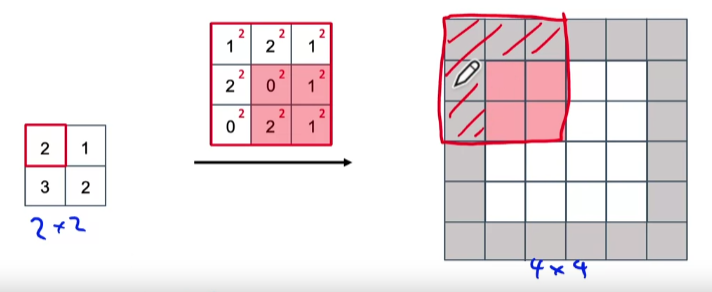

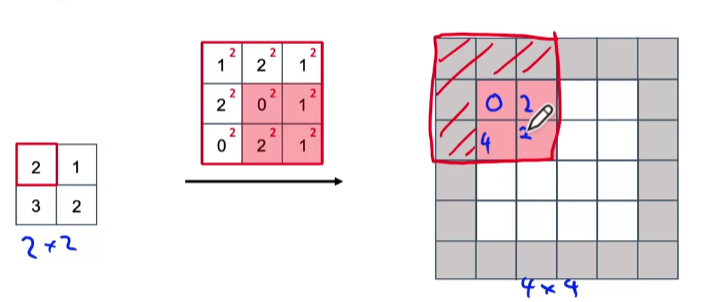

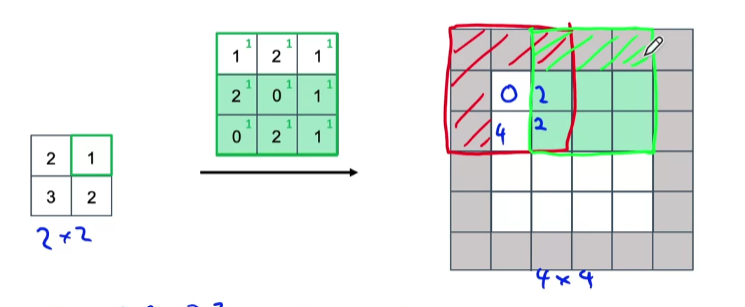

where they overlap, we add these values together

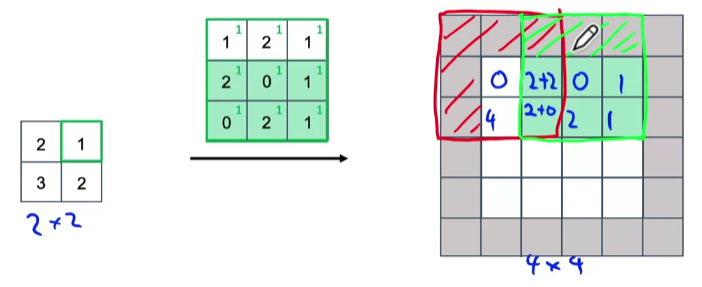

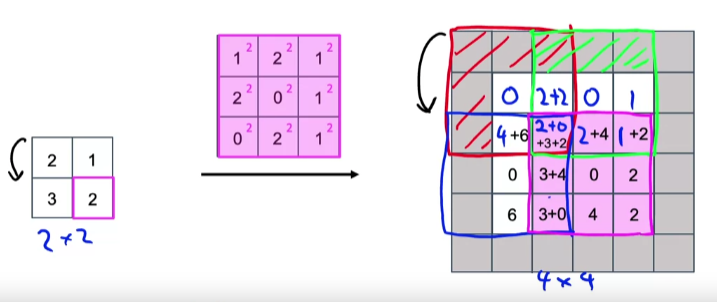

#### U-Net Architecture

Now, in the first half of the cnn, we reduce it's dimensions to get high level contextual info and in the second half, we blow up it's size.

One thing that we do to make the blown up image have more idea about the original image is provide it with info through a skip connection

So this way the layer has both the lower resolution, but high level, spatial, high level contextual information, as well as the low level but more detailed texture like information in order to make a decision as to whether a certain pixel is part of a cat or not

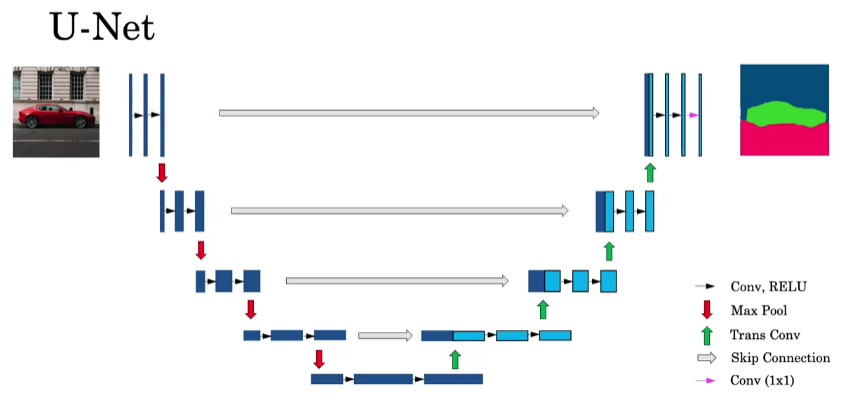

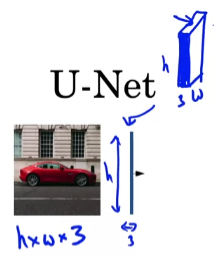

The final output will have dimension as : h x w x no. of classes

We then take the argmax to determine which pixels belong to which class